# Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Image Brightening and Darkening Using Histogram Sliding

## Image Brightening

In [2]:
def image_brightening(img, value = 100):
    
    img = img.astype(np.int16)
    img = img + value
    img = np.clip(img, 0, 255)
    img = img.astype(np.uint8)

    return img

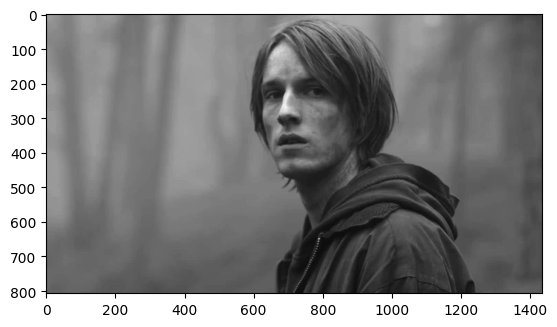

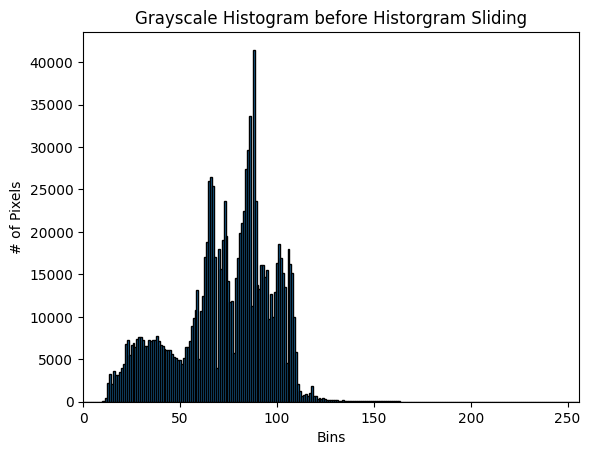

In [3]:
image_path = "images/test.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap='gray')

hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.figure()

plt.title("Grayscale Histogram before Historgram Sliding")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

plt.bar(range(256), hist[:, 0], width=1, edgecolor='black')

plt.xlim([0, 256])
plt.show()

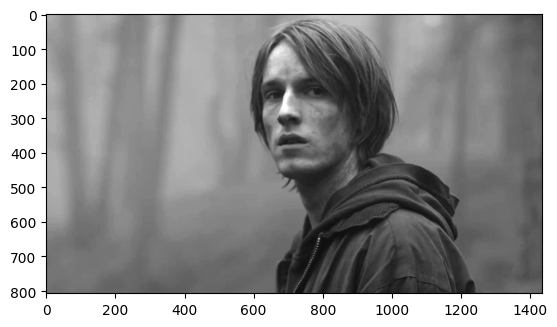

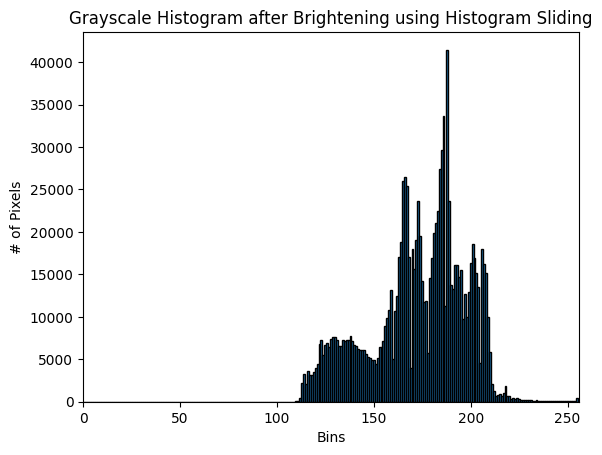

In [4]:
brightened_image = image_brightening(image, 100)

plt.imshow(brightened_image, cmap='gray')

hist = cv2.calcHist([brightened_image], [0], None, [256], [0, 256])
plt.figure()

plt.title("Grayscale Histogram after Brightening using Histogram Sliding")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

plt.bar(range(256), hist[:, 0], width=1, edgecolor='black')

plt.xlim([0, 256])
plt.show()

## Image Darkening

In [5]:
def image_darkening(img, value = 50):
    
    img = img.astype(np.int16)
    img = img - value
    img = np.clip(img, 0, 255)
    img = img.astype(np.uint8)

    return img

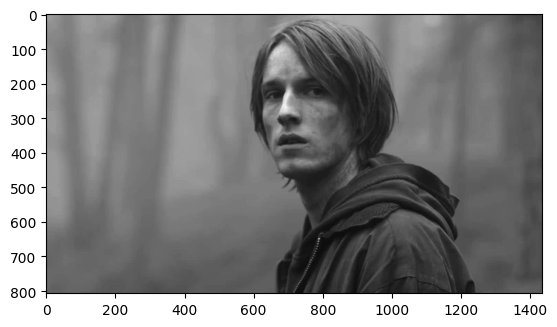

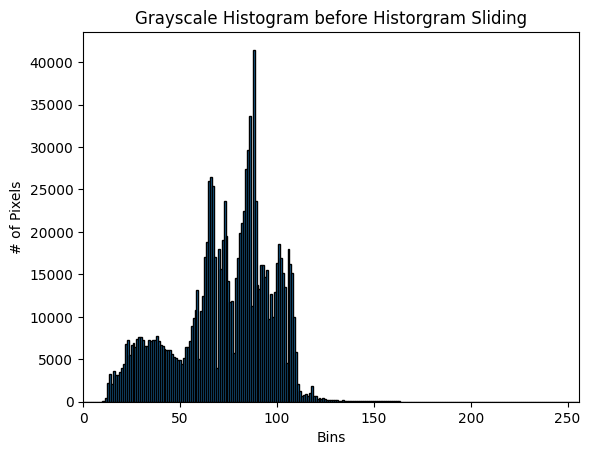

In [6]:
image_path = "images/test.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap='gray')

hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.figure()

plt.title("Grayscale Histogram before Historgram Sliding")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

plt.bar(range(256), hist[:, 0], width=1, edgecolor='black')

plt.xlim([0, 256])
plt.show()

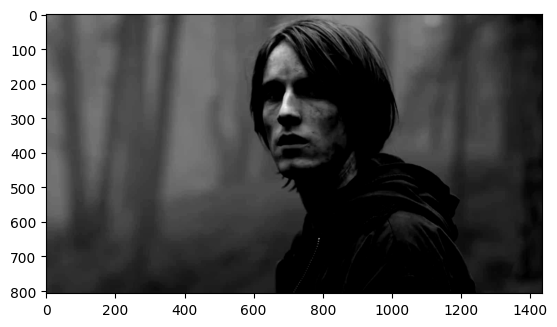

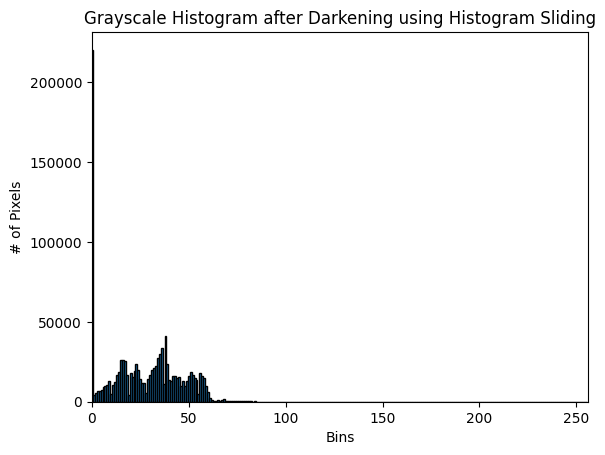

In [7]:
darkened_image = image_darkening(image, 50)

plt.imshow(darkened_image, cmap='gray')

hist = cv2.calcHist([darkened_image], [0], None, [256], [0, 256])
plt.figure()

plt.title("Grayscale Histogram after Darkening using Histogram Sliding")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

plt.bar(range(256), hist[:, 0], width=1, edgecolor='black')

plt.xlim([0, 256])
plt.show()

# 2. Contrast Changing using Histogram Equalization

In [8]:
def histogram_equalization(img):

    pmf = np.zeros(256)
    cdf = np.zeros(256)

    height = img.shape[0]
    width = img.shape[1]

    for i in range(height):
        for j in range(width):
            pmf[img[i, j]] += 1

    pmf = pmf / (height * width)

    cdf[0] = pmf[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + pmf[i]

    total_levels = 255

    cdf_multiplied = np.round(cdf * total_levels)

    new_img = np.zeros((height, width), np.uint8)

    for i in range(height):
        for j in range(width):
            new_img[i, j] = cdf_multiplied[img[i, j]]

    return new_img

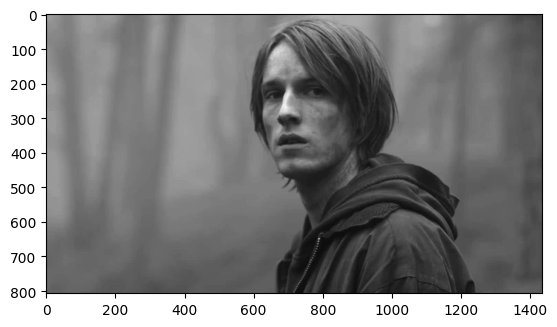

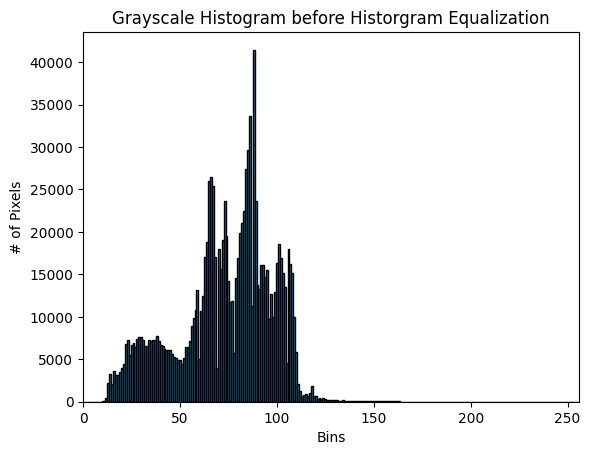

In [9]:
image_path = "images/test.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap='gray')

hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.figure()

plt.title("Grayscale Histogram before Historgram Equalization")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

plt.bar(range(256), hist[:, 0], width=1, edgecolor='black')

plt.xlim([0, 256])
plt.show()

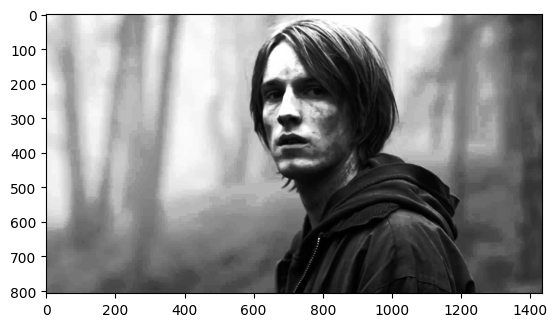

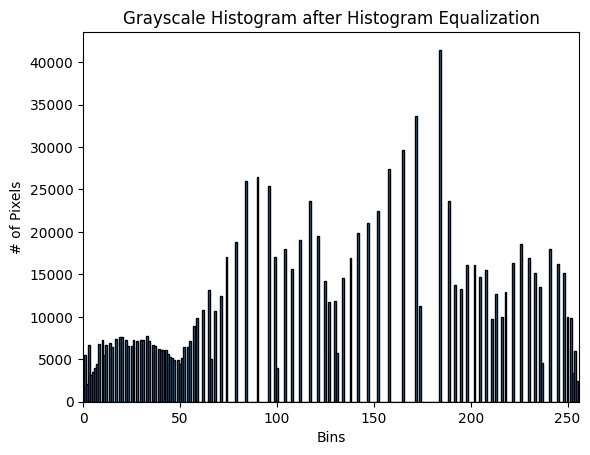

In [10]:
histogram_equalized_image = histogram_equalization(image)

plt.imshow(histogram_equalized_image, cmap='gray')

hist = cv2.calcHist([histogram_equalized_image], [0], None, [256], [0, 256])
plt.figure()

plt.title("Grayscale Histogram after Histogram Equalization")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

plt.bar(range(256), hist[:, 0], width=1, edgecolor='black')

plt.xlim([0, 256])
plt.show()